In [106]:
#program 7 - Apply EM algorithm to cluster a set of data stored in a .csv file. Use the same data set for clustering using K-Means algorithm.
# Compare the results of these two algorithms and comment on the quality of clustering. You can add java/Python ML library classes/API in the program.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [78]:
dataset = datasets.load_iris()
X = pd.DataFrame(dataset.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
Y = pd.DataFrame(dataset.target)
Y.columns = ['Targets']

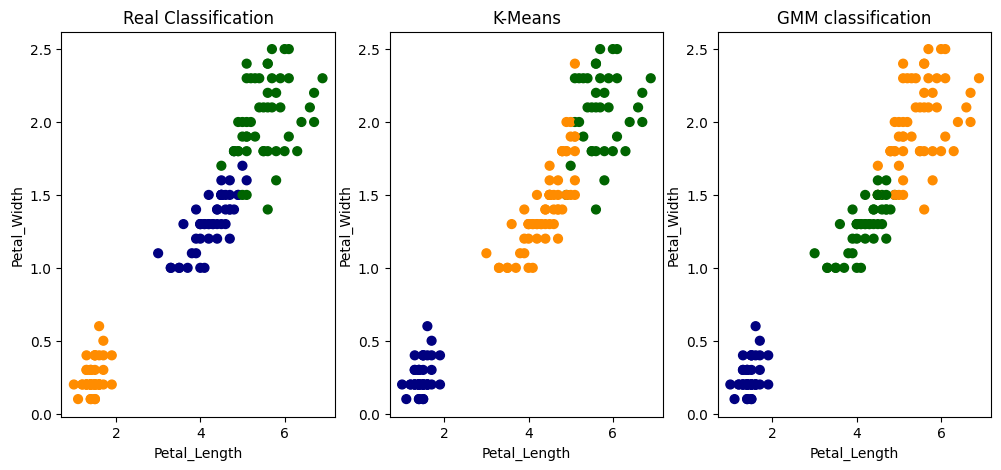

In [79]:
plt.figure(figsize=(12, 5))
colormap = np.array(['darkorange', 'navy', 'darkgreen'])

#Real plot 
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[Y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')

#KMeans plot
plt.subplot(1, 3, 2)
KMeans_model = KMeans(n_clusters=3, n_init=10)
KMeans_model.fit(X)
kmeansY = np.choose(KMeans_model.labels_, [0, 1, 2]).astype(np.int64)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[kmeansY], s=40)
plt.title('K-Means')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')

#EM plot using GaussianMixture
plt.subplot(1, 3, 3)
EM_model = GaussianMixture(n_components = 3)
EM_model.fit(X)
emY = EM_model.predict(X)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[emY], s=40)
plt.title('GMM classification')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')

plt.show()

### we can see that GaussianMixture clusters almost match the Real classification where as the some of the K-Means cluster nodes distorted.
- so can conclude GaussianMixture clustering is more accurate than K-Means clustering.
- the accuracy_score will not be effective, since the predicted target value may not be in order.

In [105]:
#Accuracy test
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
KMeans_model.fit(X_train, Y_train)
print(f'K-Means accuracy: {metrics.accuracy_score(Y_test, KMeans_model.predict(X_test))}') 
EM_model.fit(X_train,Y_train)
print(f'EM_model accuracy: {metrics.accuracy_score(Y_test, EM_model.predict(X_test))}')

K-Means accuracy: 0.8421052631578947
EM_model accuracy: 0.9473684210526315
